<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Semana6_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ciencia y Analítica de Datos**
___
Semana 6: Data Analysis with Python (IBM)  
Nombre: Sergio Omar Esparza Hernández  
Matrícula: A01794338

#Módulo 3 - Exploratory Data Analysis

Exploratory Data Analysis
___

El análisis de datos exploratorio es un paso preliminar en el análisis de datos para:  


*   Resumir las características principales de los datos.
*   Obtener una mejor comprensión del conjunto de datos.
*   Descubrir relaciones entre variables.
*   Extraer las variables importantes.



Descriptive Statistics
___
*   Describen las características principales de los datos.
*   Proporcionan breves resumenes acerca de las muestras y medidas de los datos.




El método describe de pandas resume estadísticas de los datos numéricos.

In [29]:
#Se importan las librerías y la base de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header =  None)

In [30]:
#Se modifican los nombres de las columnas de las bases de datos
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 
           'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
           'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 
           'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
           'city_mpg', 'highway_mpg', 'price']
df.columns = headers

In [31]:
df.describe() #Este método proporciona una breve descripción de los datos numéricos.
#Cualquier valor faltante es omitido en estos calculos.

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Una manera de resumir los datos categoricos es utilizando el método value_counts(). 

In [32]:
drive_wheels_counts = pd.DataFrame(df['drive_wheels'].value_counts())
drive_wheels_counts
drive_wheels_counts.rename(columns = {'drive_wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive_wheels'
drive_wheels_counts

,value_counts
drive_wheels,
fwd,120
rwd,76
4wd,9


Los diagramas de caja son una buena forma de visualizar datos numéricos. Se puede visulizar la distribución de los datos. Las principales características que muestra esta gráfica son: la mediana, el primer cuartil, el tercer cuartil, el rango intercuartil, los extremos superior e inferior (valores calculados utilizando 1.5 veces el rango intercuartil) y los outliers (valores que se salen de los extremos superior e inferior).

Los diagramas de caja son útiles para comparar diferentes grupos.

In [33]:
import seaborn as sns


In [34]:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [35]:
df.replace('?', np.nan, inplace=True)
df['price'] = pd.to_numeric(df['price'])
media = np.mean(df.price)
df['price'] = df['price'].replace(np.nan, media)

In [36]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


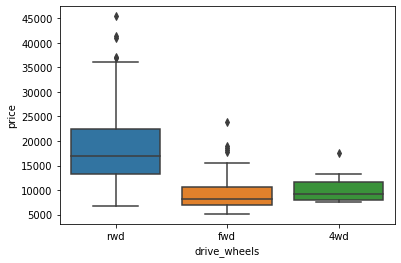

In [37]:
sns.boxplot(x = 'drive_wheels', y = 'price', data=df) #Boxplot para comparar los precios de las diferentes categorías en drive_wheels

Los gráficos de dispersión son útiles para comprender las relaciones entre variables. Este gráfico puede aportar información sobre si una variable puede predecir a otra. Los gráficos de dispersión muestran las relaciones entre dos variables.

El gráfico necesita de dos variables:


1.   La variable independiente en el eje x. La variable que predice a la otra.
2.   La variable objetivo en el eje y. La variable que se intenta predecir.



In [38]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0, 0.5, 'Price')

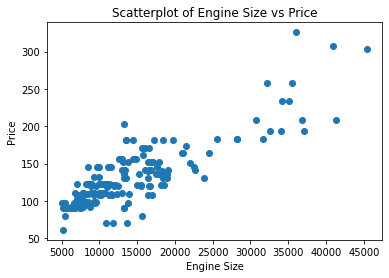

In [39]:
y = df['engine_size']
x = df['price']
plt.scatter(x, y)
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

GroupBy in Python
___